In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import re

# Definir les etiquette

In [8]:
# Supposons que vous avez une liste de labels pour chaque fichier audio
labels_train = [
    "zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero",
    "zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero",
    "zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero",
    "zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero",
    "zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero",
    "zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero",
    "zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero",
    "zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero",
    "zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero",
    "zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero",
    "zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero",
    "zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero",
    "zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero",
    "zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero",
    "zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero","zero",
    "one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one",
    "one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one",
    "one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one",
    "one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one",
    "one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one",
    "one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one",
    "one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one",
    "one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one",
    "one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one",
    "one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one",
    "one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one",
    "one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one",
    "one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one",
    "one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one",
    "one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one","one",
    "two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two",
    "two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two",
    "two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two",
    "two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two",
    "two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two",
    "two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two",
    "two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two",
    "two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two",
    "two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two",
    "two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two",
    "two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two",
    "two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two",
    "two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two",
    "two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two",
    "two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two","two",
    "three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three",
    "three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three",
    "three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three",
    "three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three",
    "three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three",
    "three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three",
    "three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three",
    "three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three",
    "three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three",
    "three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three",
    "three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three",
    "three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three",
    "three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three",
    "three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three",
    "three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three","three",
    "four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four",
    "four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four",
    "four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four",
    "four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four",
    "four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four",
    "four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four",
    "four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four",
    "four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four",
    "four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four",
    "four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four",
    "four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four",
    "four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four",
    "four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four",
    "four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four",
    "four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four","four",
    "five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five",
    "five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five",
    "five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five",
    "five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five",
    "five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five",
    "five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five",
    "five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five",
    "five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five",
    "five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five",
    "five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five",
    "five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five",
    "five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five",
    "five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five",
    "five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five",
    "five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five","five",
    "six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six",
    "six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six",
    "six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six",
    "six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six",
    "six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six",
    "six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six",
    "six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six",
    "six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six",
    "six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six",
    "six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six",
    "six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six",
    "six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six",
    "six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six",
    "six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six",
    "six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six","six",
    "seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven",
    "seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven",
    "seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven",
    "seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven",
    "seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven",
    "seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven",
    "seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven",
    "seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven",
    "seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven",
    "seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven",
    "seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven",
    "seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven",
    "seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven",
    "seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven",
    "seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven","seven",
    "height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height",
    "height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height",
    "height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height",
    "height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height",
    "height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height",
    "height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height",
    "height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height",
    "height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height",
    "height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height",
    "height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height",
    "height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height",
    "height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height",
    "height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height",
    "height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height",
    "height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height","height",
    "nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine",
    "nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine",
    "nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine",
    "nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine",
    "nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine",
    "nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine",
    "nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine",
    "nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine",
    "nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine",
    "nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine",
    "nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine",
    "nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine",
    "nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine",
    "nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine",
    "nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine","nine"
]

# Convertir les labels en un format numérique (par exemple, utiliser un encodage one-hot)
for i in range(len(labels_train)):
    # Conversion en minuscules
    labels_train[i] = labels_train[i].lower()
    # Suppression de la ponctuation
    labels_train[i] = re.sub(r'[^\w\s]', '', labels_train[i])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels_train)
print(y.shape)

(3000,)


# Importations

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import torchaudio
from torchvision.transforms import Compose
from torchaudio.transforms import MelSpectrogram

# entraînement du modèle de classification vocale en utilisant PyTorch et les caractéristiques MFCC

In [10]:
# Diviser X et y en un ensemble d'entraînement (80%) et un ensemble de validation (20%)
X = np.load("mfcc_feature2.npy")
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)


(3000, 13, 38)


In [12]:

# Définir les hyperparamètres
# input_size = X_train.shape[1]  # Nombre de coefficients MFCC

input_size = 38
sequence_length = 13 # ou 492
hidden_size = 1024  # Taille de la couche cachée
num_classes = y.shape[0]  # Nombre de classes (mots/phrases)
num_epochs = 120

batch_size = len(X_train)
learning_rate = 0.001
 
# modification ici
num_layers = 2 


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#mfcc_features = np.random.rand(100, 13)
#labels = np.random.randint(0, 10, size=100)

# Convertir les données en tensors PyTorch
X_train_tensor = torch.Tensor(X_train)
X_test_tensor = torch.Tensor(X_test)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

# Créer des DataLoader PyTorch
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# print(type(train_loader))
# Définir l'architecture du modèle
class SpeechToTextModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(SpeechToTextModel, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        
        # self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.gru(x, h0)
        # out : batch_size , sequence_len , hidden_size 
        # out (N, 13, 1024)
        out = out[:, -1, :]
        # out (N, 128)
        out = self.fc(out)
        return out


def accuracy(proba_batch, label_batch):
    correct = 0
    preds = torch.argmax(proba_batch, dim=1)
    for i, pred in enumerate(preds):
        if pred == label_batch[i]:
            correct += 1
    return correct / batch_size

# Initialiser le modèle
model = SpeechToTextModel(input_size, hidden_size, num_layers , num_classes)

# Définir la fonction de perte et l'optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # Utilisation du paramètre weight_decay pour la régularisation L2

# Entraîner le modèle
train_loss = []
train_acc = []
test_loss = []
test_acc = []
for epoch in tqdm(range(num_epochs)):
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):

        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        acc = accuracy(outputs, labels)
    train_loss.append(loss.item())
    train_acc.append(acc)
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs) 
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        test_loss.append(loss)
        test_acc.append(correct / total)
print(f'valid_loss = {100 * loss / total : .3}% \nvalid_acc = {100 * correct / total : .3}%')
print(f'Accuracy du neurone sur le test set: {100 * correct / total}%')
    
print('Entraînement terminé.')
# Sauvegarder le modèle entraîné
torch.save(model.state_dict(), 'model.pth')

  9%|▉         | 11/120 [10:03<1:39:36, 54.83s/it]


KeyboardInterrupt: 

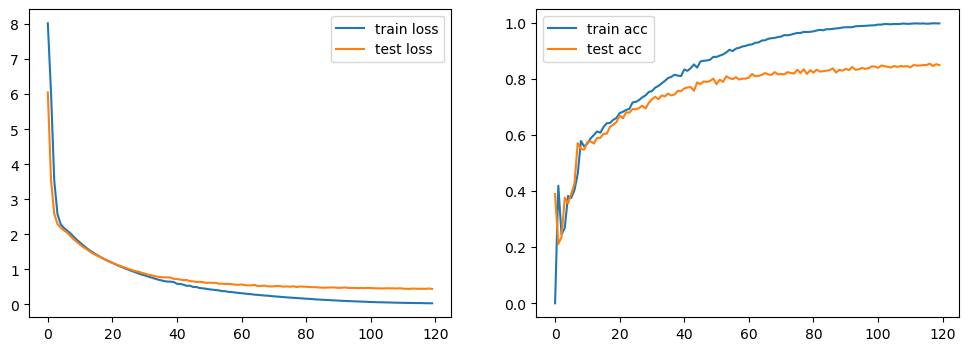

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label="train loss")
plt.plot(test_loss, label="test loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_acc, label="train acc")
plt.plot(test_acc, label="test acc")
plt.legend()
plt.show()

In [ ]:
# Diviser X et y en un ensemble d'entraînement (80%) et un ensemble de validation (20%)
X = np.load("mfcc_feature1.npy")
X_train, X_set, y_train, y_set = train_test_split(X, y, test_size=0.2, random_state=34)
X_valid, X_test, y_valid, y_test = train_test_split(X_set, y_set, test_size=0.5, random_state=34)

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_valid = X_valid.reshape(X_valid.shape[0], 1, X_valid.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
# Définir les hyperparamètres
input_size = X_train.shape[2]  # Nombre de coefficients MFCC
hidden_size = 1024  # Taille de la couche cachée
num_classes = y.shape[0]  # Nombre de classes (mots/phrases)
num_epochs = 100
batch_size = len(X_train)
learning_rate = 0.001
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Convertir les données en tensors PyTorch
X_train_tensor = torch.Tensor(X_train)
X_valid_tensor = torch.Tensor(X_valid)
X_test_tensor = torch.Tensor(X_test)
y_train_tensor = torch.LongTensor(y_train)
y_valid_tensor = torch.LongTensor(y_valid)
y_test_tensor = torch.LongTensor(y_test)

# Créer des DataLoader PyTorch
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
valid_dataset = TensorDataset(X_valid_tensor, y_valid_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=len(X_valid), shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=len(X_test), shuffle=True)

class ActDropNormRNN(nn.Module):
    def __init__(self, n_feats, dropout, keep_shape=False):
        super(ActDropNormRNN, self).__init__()
        self.dropout = nn.Dropout(dropout)
        self.norm = nn.LayerNorm(n_feats)
        self.keep_shape = keep_shape
    
    def forward(self, x):
        x = x.transpose(1, 2)
        # x = self.norm(self.dropout(F.gelu(x)))
        x = self.dropout(F.gelu(self.norm(x)))
        if self.keep_shape:
            return x.transpose(1, 2)
        else:
            return x


class SpeechRecognition(nn.Module):
    # hyper_parameters = {
    #     "num_classes": 29,
    #     "n_feats": 1131,
    #     "dropout": 0.1,
    #     "hidden_size": 1024,
    #     "num_layers": 1
    # }

    def __init__(self, hidden_size, num_classes, n_feats, num_layers, dropout):
        super(SpeechRecognition, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.rnn = ModelRNN(n_feats, hidden_size)  # Utilisation du RNN personnalisé
        self.dense = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.LayerNorm(128),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(128, 128),
            nn.LayerNorm(128),
            nn.GELU(),
            nn.Dropout(dropout),
        )
        self.lstm = nn.LSTM(input_size=128, hidden_size=hidden_size,
                            num_layers=num_layers, dropout=0.0,
                            bidirectional=False)
        self.layer_norm2 = nn.LayerNorm(hidden_size)
        self.dropout2 = nn.Dropout(dropout)
        self.final_fc = nn.Linear(hidden_size, num_classes)

    def _init_hidden(self, batch_size):
        n, hs = self.num_layers, self.hidden_size
        return (torch.zeros(n*1, batch_size, hs),
                torch.zeros(n*1, batch_size, hs))

    def forward(self, x, hidden):
        x = x.squeeze(1)  # batch, feature, time
        x = self.rnn(x)  # batch, time, hidden_size
        x = self.dense(x) # batch, time, feature
        x = x.transpose(0, 1) # time, batch, feature
        out, (hn, cn) = self.lstm(x, hidden)
        # Ajustement des dimensions de hx et cx
        hn = hn.squeeze(0)  # hn devient 2D
        cn = cn.squeeze(0)  # cn devient 2D
        x = self.dropout2(F.gelu(self.layer_norm2(out)))  # (time, batch, n_class)
        return self.final_fc(x), (hn, cn)

class ModelRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(ModelRNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        C0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.rnn(x, (h0, C0))
        return out

class ModelLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout):
        super(ModelLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.layer_norm = nn.LayerNorm(hidden_size)
        self.dropout = nn.Dropout(dropout)
        self.final_fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x, hidden):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        C0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        
        out, (hn, cn) = self.lstm(x, hidden)
        x = self.dropout(F.gelu(self.layer_norm(out)))  # Shape: batch_size, time_steps, hidden_size
        return self.final_fc(x), (hn, cn)

def accuracy(proba_batch, label_batch):
    correct = 0
    preds = torch.argmax(proba_batch, dim=1)
    for i, pred in enumerate(preds):
        if pred == label_batch[i]:
            correct += 1
    return correct / batch_size

# Définition du modèle
model = SpeechRecognition(hidden_size=hidden_size, num_classes=num_classes, n_feats=input_size, num_layers=1, dropout=0.1)

# Définition de la fonction de perte et de l'optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_train = []
loss_acc = []
# Entraînement du modèle
for epoch in tqdm(range(num_epochs)):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs, _ = model(inputs.unsqueeze(1), model._init_hidden(inputs.size(0)))  # Ajout de unsqueeze(1) pour correspondre à la taille du batch
        loss = criterion(outputs.squeeze(), labels)  # Ajustement pour correspondre à la taille du batch
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    loss_train.append(epoch_loss)
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs, _ = model(inputs.unsqueeze(1), model._init_hidden(inputs.size(0)))
            loss = criterion(outputs.squeeze(), labels)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            # print(outputs.shape)
            # correct += (predicted == labels).sum().item()
    accuracy = correct / total
    loss_acc.append(loss)
    # print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

print("Entraînement terminé.")
# Sauvegarder le modèle entraîné
torch.save(model.state_dict(), 'model.pth')

  0%|          | 0/100 [00:00<?, ?it/s]


AttributeError: 'tuple' object has no attribute 'dim'

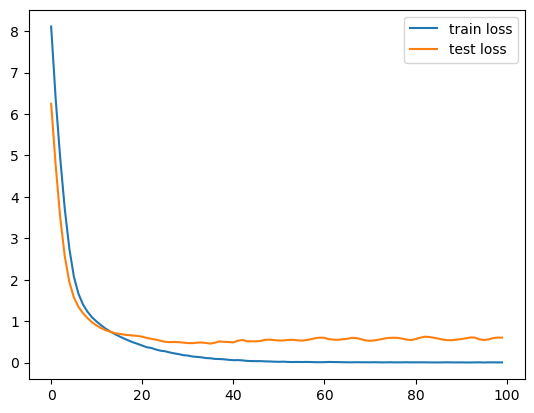

In [ ]:
plt.plot(loss_train, label="train loss")
plt.plot(loss_acc, label="test loss")
plt.legend()
plt.show()

# Accuracy

In [ ]:
# Charger le modèle depuis le fichier 'model.pth'
model = SpeechRecognition(hidden_size=hidden_size, num_classes=len(X_valid), n_feats=input_size, num_layers=1, dropout=0.1)
model.load_state_dict(torch.load('model.pth'))
model.eval()

# Définir le mode d'évaluation sur le GPU s'il est disponible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

acc = []
loss_acc = []
for epoch in range(num_epochs):
    # Évaluer le modèle sur l'ensemble de validation
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs, _ = model(inputs.unsqueeze(1), model._init_hidden(inputs.size(0)))
            loss = criterion(outputs.squeeze(), labels)
            _, predicted = torch.max(outputs.unsqueeze(0).data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    acc.append(accuracy)
    loss_acc.append(loss)
print(f"Accuracy on validation set: {100 * accuracy:.6f}%")

RuntimeError: Error(s) in loading state_dict for SpeechRecognition:
	size mismatch for final_fc.weight: copying a param with shape torch.Size([3000, 1024]) from checkpoint, the shape in current model is torch.Size([300, 1024]).
	size mismatch for final_fc.bias: copying a param with shape torch.Size([3000]) from checkpoint, the shape in current model is torch.Size([300]).

In [ ]:
X = np.load("mfcc_feature1.npy")
X = torch.Tensor(X)
X = X.reshape(X.shape[0], 1, -1)

with torch.no_grad():
    output = model(X)
print(output.shape)  # Output shape: (batch_size, seq_length, vocab_size)
# Supposons que output soit le tenseur de sortie de votre modèle
batch_size, seq_length, vocab_size = output.size()

# Convertir les logits en probabilités en utilisant une fonction softmax
probs = torch.softmax(output, dim=2)

# Sélectionner l'indice du mot le plus probable à chaque pas de temps (décodage glouton)
predicted_indices = torch.argmax(probs, dim=2)

# Convertir les indices prédits en texte
vocab = []
for i in range(len(y_train)):
    vocab.append(labels_train[y_train[i]])   # Liste des mots dans le vocabulaire

predicted_text = []
for i in range(batch_size):
    text = ' '.join([vocab[idx.item()] for idx in predicted_indices[i]])
    predicted_text.append(text)

# Afficher le texte prédit pour chaque exemple dans le batch
for i, text in enumerate(predicted_text):
    print(f"Exemple {i+1}: {text}")

TypeError: SpeechRecognition.forward() missing 1 required positional argument: 'hidden'

In [ ]:
with torch.no_grad():
    tensor_transcription = model(X)

# Convertir le tensor en texte (c'est là que vous adapteriez en fonction du retour de votre modèle)
text_transcription = " ".join([str(x) for x in tensor_transcription.tolist()])

print("Transcription du fichier audio :")
print(text_transcription)

Transcription du fichier audio :
[[0.5230773687362671, 3.57779598236084, -1.9111279249191284, 2.2665138244628906, 3.8195252418518066, 2.708723783493042, 0.8280423283576965, 2.8036773204803467, 2.8155388832092285, 9.030430793762207, -1.7865791320800781, -1.8906002044677734, -1.9505760669708252, -2.270986318588257, -1.653630256652832, -2.3868398666381836, -3.0630881786346436, -1.9287863969802856, -2.9361019134521484, -2.4584786891937256, -1.5044533014297485, -2.061436176300049, -2.8745298385620117, -2.085926055908203, -2.162581443786621, -1.9477061033248901, -2.184143304824829, -2.710115909576416, -2.4315013885498047, -2.4151618480682373, -2.4765727519989014, -2.1074814796447754, -1.9225620031356812, -1.5148707628250122, -2.5748026371002197, -2.7381956577301025, -2.15958833694458, -1.991007924079895, -2.438112735748291, -3.011410713195801, -1.9697623252868652, -3.467130184173584, -2.9188215732574463, -2.0015616416931152, -2.541179895401001, -2.7993111610412598, -1.7557158470153809, -1.70

In [ ]:
# Chargement de votre modèle pré-entraîné (assurez-vous d'avoir les bonnes instructions pour charger votre modèle spécifique)
my_pretrained_model = torch.load("model.pth")

# Fonction pour prétraiter les données audio (adapter selon les besoins de votre modèle)
def preprocess_audio(audio_file):
    # Lire le fichier audio et effectuer le prétraitement nécessaire (par exemple, conversion en MFCC)
    # Assurez-vous que la forme et le format des données audio correspondent aux attentes de votre modèle
    # Exemple simplifié pour les besoins de l'exemple :
    audio_data = np.load(audio_file)
    return audio_data

# Chemin du fichier audio à traiter
audio_file = "audio_chiffre/3_jackson_3.wav"

# Charger et prétraiter le fichier audio
audio_data = preprocess_audio(audio_file)

# Utiliser votre modèle pour transcrire le texte du signal audio
with torch.no_grad():
    text_transcription = my_pretrained_model(audio_data)

print("Transcription du fichier audio :")
print(text_transcription)

ValueError: Cannot load file containing pickled data when allow_pickle=False

# Preproce

In [ ]:
from sklearn.preprocessing import StandardScaler
import librosa
import numpy as np
def correction_accent(audio_file):
    signal, sample_rate = audio_file

    # Calculer les coefficients cepstraux MFCC
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13)

    # Normaliser les coefficients MFCC
    scaler = StandardScaler()
    return scaler.fit_transform(mfccs.T).T

# Prétraiter les données audio
transform = Compose([
    torchaudio.transforms.Resample(orig_freq=44100, new_freq=16000),  # Échantillonnage à 16 kHz
    MelSpectrogram(n_fft=400, win_length=400, hop_length=160, n_mels=128)  # Créer un spectrogramme Mel
])

# Passer les données à travers le modèle
audio_path = 'norm_temporelle.wav'
waveform, sample_rate = torchaudio.load(audio_path)
spectrogram = transform(waveform).unsqueeze(0)  # Ajouter une dimension de lot
spectrogram = np.array(spectrogram)
spectrogram = spectrogram.reshape(-1)
# spectrogram = np.array(spectrogram)
mfcc = correction_accent((spectrogram, sample_rate))
mfcc = torch.Tensor(mfcc)
spectrogram = mfcc.to(device)

c:\Users\hp\anaconda3\Lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


In [ ]:
# 1. Charger le modèle
model = torch.load('model.pth')
# model.eval()

# 2. Prétraiter les données audio
transform = Compose([
    torchaudio.transforms.Resample(orig_freq=44100, new_freq=16000),  # Échantillonnage à 16 kHz
    MelSpectrogram(n_fft=400, win_length=400, hop_length=160, n_mels=128)  # Créer un spectrogramme Mel
])

# 3. Passer les données à travers le modèle
audio_path = 'norm_temporelle.wav'
waveform, sample_rate = torchaudio.load(audio_path)
spectrogram = transform(waveform).unsqueeze(0)  # Ajouter une dimension de lot
print(spectrogram.shape)
# Si vous utilisez GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(device)
# model = model.to(device)
spectrogram = spectrogram.to(device)

# Obtenir les prédictions
with torch.no_grad():
    outputs = model(spectrogram)

# Appliquer la fonction softmax si nécessaire
probs = F.softmax(outputs, dim=1)
predictions = torch.argmax(probs, dim=1)

# Faire quelque chose avec les prédictions
print("Prédictions:", predictions)

torch.Size([1, 1, 128, 44])


c:\Users\hp\anaconda3\Lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


TypeError: 'collections.OrderedDict' object is not callable

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Phrase à tokenizer
sentence = "Ceci est un exemple de phrase à tokenizer."

# Tokenisation des mots
tokens = word_tokenize(sentence)

# Affichage des tokens
print(tokens)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\hp/nltk_data'
    - 'c:\\Users\\hp\\anaconda3\\nltk_data'
    - 'c:\\Users\\hp\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\hp\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\hp\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Exemple de données texte
texts = ["Ceci est un exemple de phrase.", "Voici un autre exemple."]

# Initialiser le CountVectorizer
vectorizer = CountVectorizer(binary=True)

# Adapter le vectorizer aux données et encoder les données texte
encoded_texts = vectorizer.fit_transform(texts)

# Afficher les textes encodés
print(encoded_texts.toarray())

[[0 1 1 1 1 1 1 0]
 [1 0 0 0 1 0 1 1]]


In [ ]:
# Exemple de données textuelles
# data = [
#     "Je mange une pomme.",
#     "Il fait beau aujourd'hui.",
#     "Bonjour, comment ça va ?"
# ]
data = labels_train

# Tokenisation et création du vocabulaire
word_to_index = {}
index_to_word = {}
for sentence in data:
    tokens = sentence.split()
    for token in tokens:
        if token not in word_to_index:
            word_to_index[token] = len(word_to_index)
            index_to_word[len(index_to_word)] = token

# Encodage des séquences
encoded_data = []
for sentence in data:
    tokens = sentence.split()
    encoded_sentence = [word_to_index[token] for token in tokens]
    encoded_data.append(encoded_sentence)

# Création du Dataset et DataLoader
class LanguageDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return torch.tensor(self.data[index])

dataset = LanguageDataset(encoded_data)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

# Définition du modèle de langue (exemple avec un LSTM)
class LanguageModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers):
        super(LanguageModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.lstm(embedded)
        output = self.fc(output[-1, :])
        return output

# Paramètres du modèle
vocab_size = len(word_to_index)
embedding_dim = 128
hidden_dim = 256
num_layers = 2

# Création du modèle
model = LanguageModel(vocab_size, embedding_dim, hidden_dim, num_layers)

# Définition de la fonction de coût et de l'optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Boucle d'entraînement
for epoch in tqdm(range(10)):
    total_loss = 0
    for batch in dataloader:
        optimizer.zero_grad()
        output = model(batch)
        print(f"output : {output.shape}")
        print(f"batch : {batch.shape}")
        loss = criterion(output, batch.view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch [{epoch+1}/100], Loss: {total_loss/len(dataloader)}')

NameError: name 'labels_train' is not defined

In [ ]:
# Évaluation du modèle (exemples de prédiction)
input_test = torch.tensor([[word_to_index["one"], word_to_index["three"], word_to_index["three"], word_to_index["three"], word_to_index["one"]]])
output_test = model(input_test)
predicted_index = torch.argmax(output_test)
predicted_word = index_to_word[predicted_index.item()]
print('Predicted Word:', predicted_word)

KeyError: 'one'